In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

In [2]:
df=pd.read_excel(r"C:\Users\ankit\Python Project\Helth insurance project\premiums_old.xlsx")

In [3]:
df["Genetical_risk"]=0

In [4]:
df.head(2)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0


In [5]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_risk'],
      dtype='object')

In [6]:
df.shape

(29904, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29904 entries, 0 to 29903
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    29904 non-null  int64 
 1   Gender                 29904 non-null  object
 2   Region                 29904 non-null  object
 3   Marital_status         29904 non-null  object
 4   Number Of Dependants   29904 non-null  int64 
 5   BMI_Category           29904 non-null  object
 6   Smoking_Status         29895 non-null  object
 7   Employment_Status      29903 non-null  object
 8   Income_Level           29895 non-null  object
 9   Income_Lakhs           29904 non-null  int64 
 10  Medical History        29904 non-null  object
 11  Insurance_Plan         29904 non-null  object
 12  Annual_Premium_Amount  29904 non-null  int64 
 13  Genetical_risk         29904 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount,Genetical_risk
count,29904.000000,29904.000000,29904.000000,29904.000000,29904.0
mean,43.396536,2.380116,23.362059,20893.036684,0.0
std,13.411893,1.431140,24.737076,6935.844219,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15698.000000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [9]:
df.columns=df.columns.str.replace(" ","_").str.lower()

In [10]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [11]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

## Handling nulls and duplicates

In [12]:
df.dropna(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [16]:
df[df.number_of_dependants<0]["number_of_dependants"].value_counts()

number_of_dependants
-1    30
-3    20
Name: count, dtype: int64

In [17]:
df.number_of_dependants=np.abs(df.number_of_dependants)

In [18]:
df.number_of_dependants.describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

# Outlier Treatment

In [19]:
def bplot(data):

    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR

    
    sns.boxplot(data)
    plt.axhline(lower, color='red', linestyle='--', label='Lower Bound')
    plt.axhline(upper, color='blue', linestyle='--', label='Upper Bound')
    plt.legend()
    plt.show()

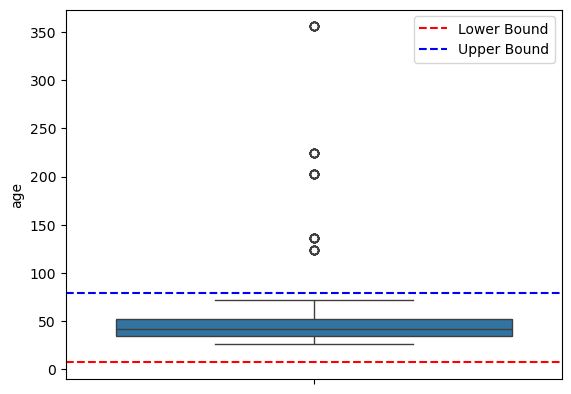

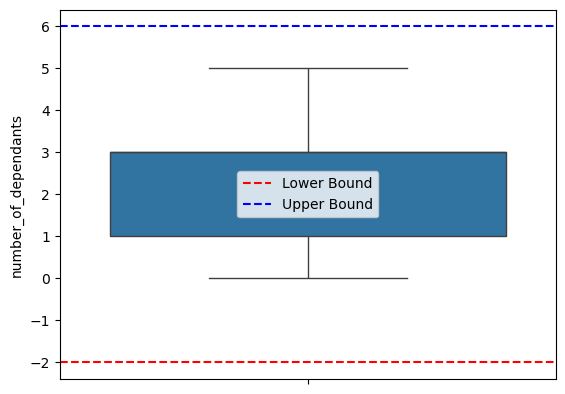

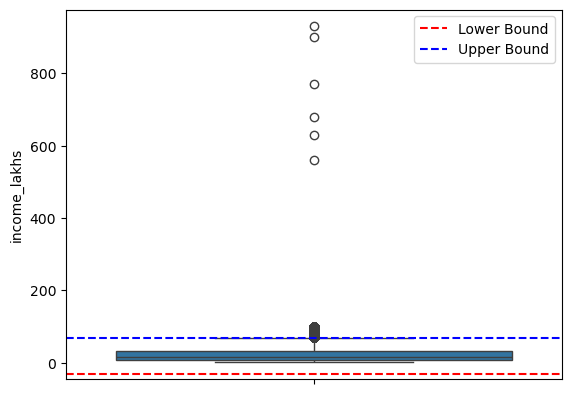

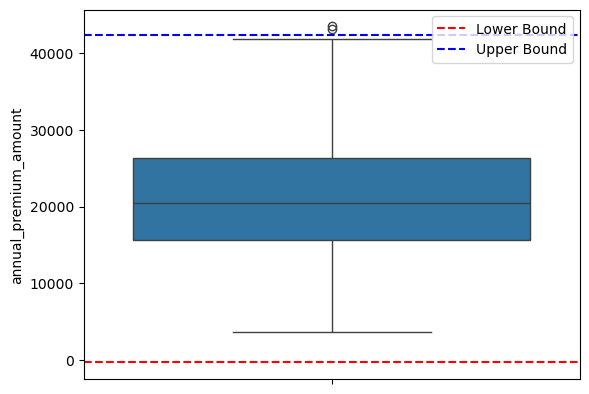

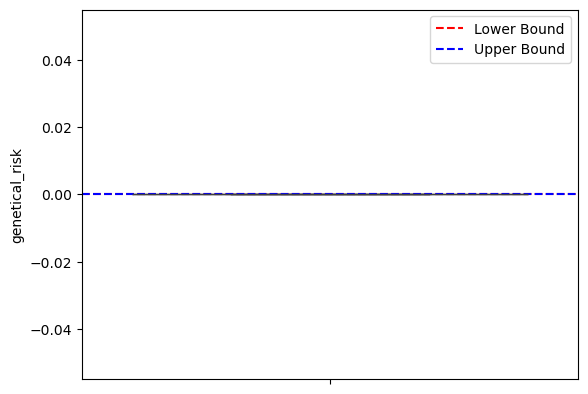

In [20]:
for c in df.select_dtypes([float,int]).columns:
    bplot(df[c])

In [21]:
df1=df[df.age<=100].copy()

# univariate analysis

<Axes: xlabel='income_lakhs', ylabel='Count'>

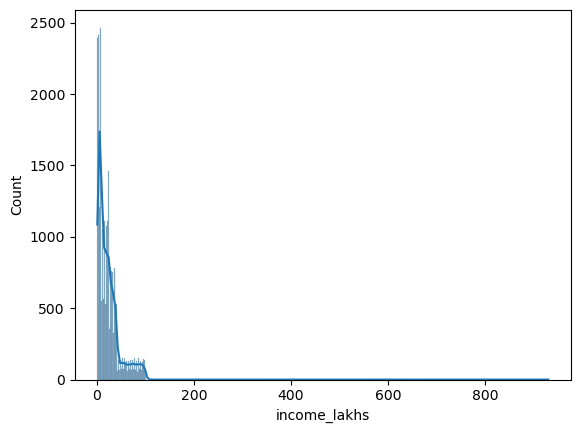

In [22]:
sns.histplot(df1.income_lakhs,kde=True)

In [23]:
def iqr_bounds(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    return upper,lower

In [24]:
df2=df1[df1.income_lakhs<=df1.income_lakhs.quantile(0.999)].copy()

In [25]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.387734,23.226343,20900.689223,0.0
std,11.042430,1.420644,22.455408,6928.192115,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


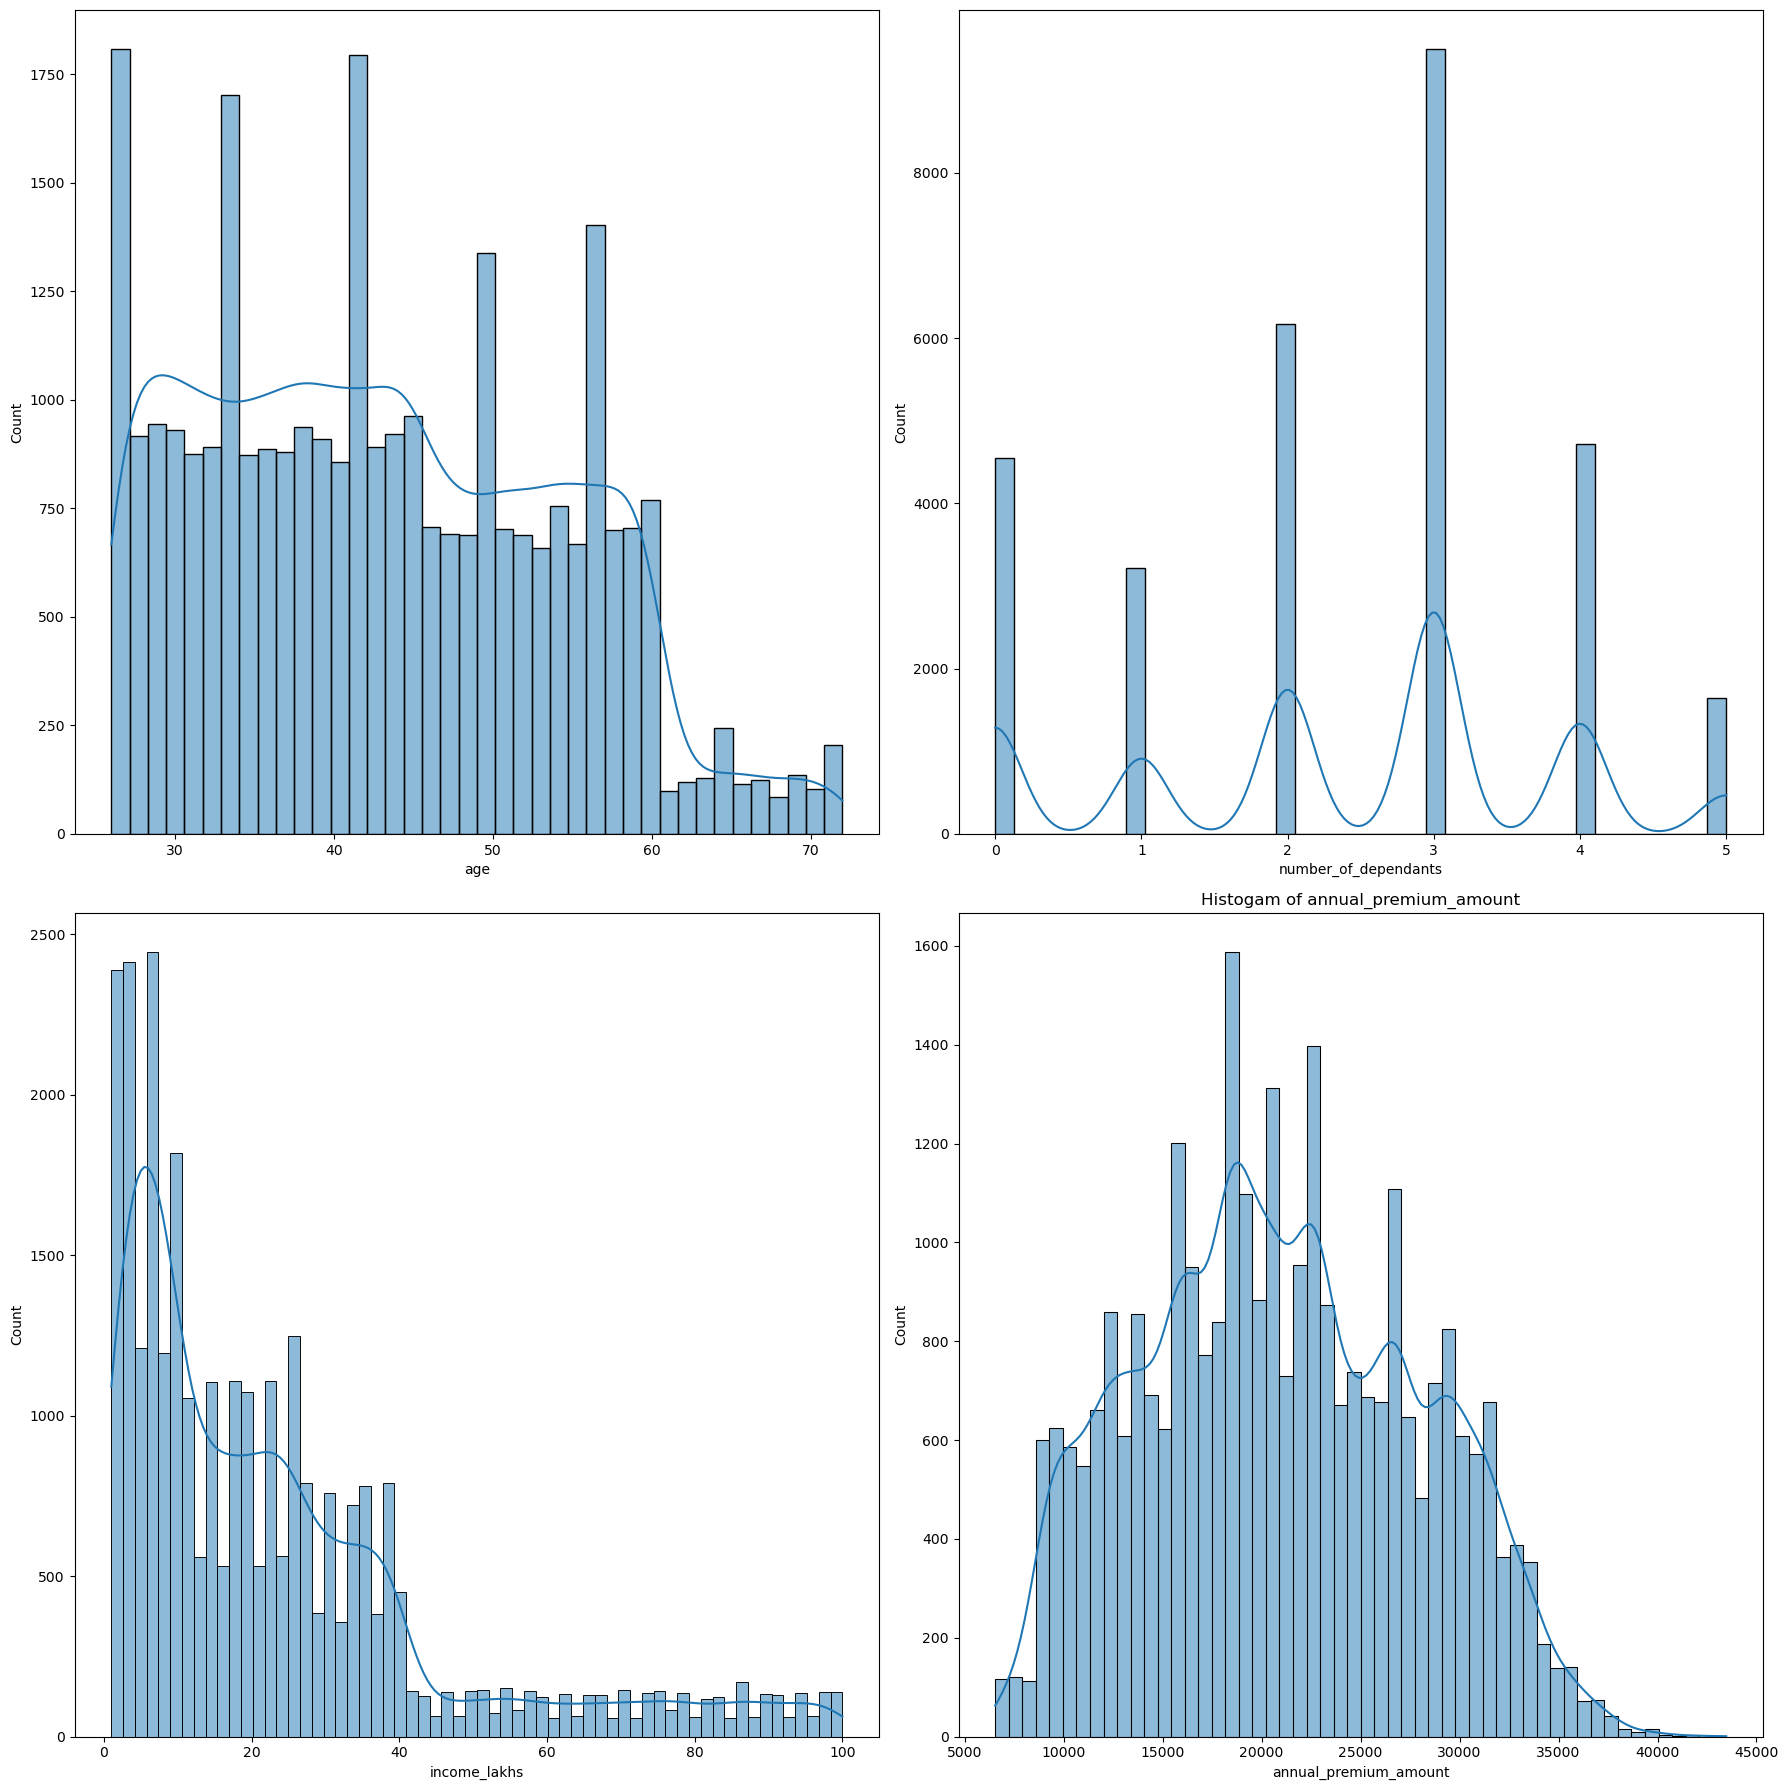

In [26]:
fig,axes=plt.subplots(2,2,figsize=(18,18))
axes=axes.flatten()



for ax,col in zip(axes,df2.select_dtypes([float,int]).columns):
    
    
    plt.title(f"Histogam of {col}")
    sns.histplot(df2[col],kde=True,ax=ax)
    
plt.tight_layout()    
plt.show()
    

# Bivariate analysis

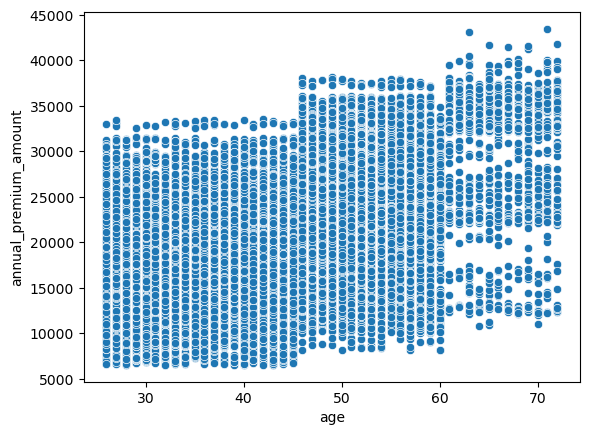

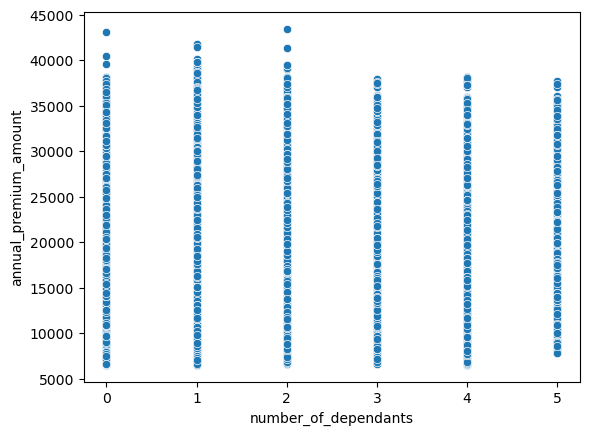

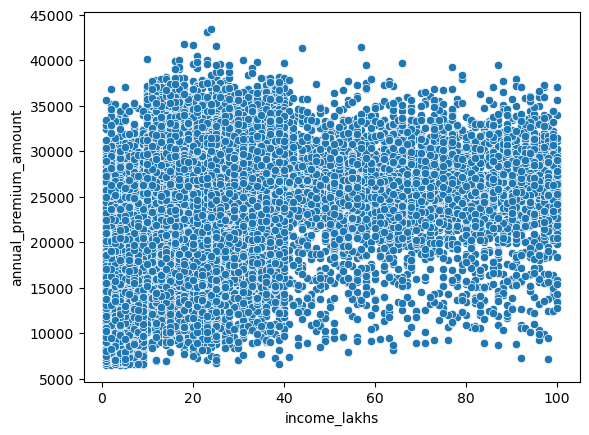

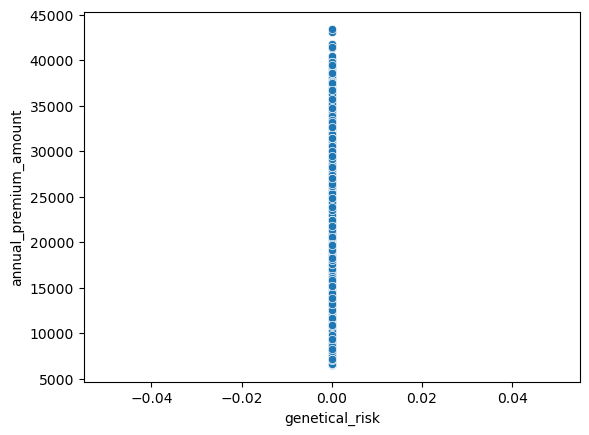

In [27]:
for col in df2.select_dtypes([float,int]).columns:
    if col=="annual_premium_amount":
        continue
    sns.scatterplot(x=df2[col],y=df2.annual_premium_amount)
    plt.show()

In [28]:
for col in df2.select_dtypes('object').columns:
    print(f"{col}:",df2[col].unique())
    

gender: ['Male' 'Female']
region: ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status: ['Unmarried' 'Married']
bmi_category: ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status: ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status: ['Salaried' 'Self-Employed' 'Freelancer']
income_level: ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history: ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan: ['Bronze' 'Silver' 'Gold']


In [29]:
df2["smoking_status"]=df2["smoking_status"].replace({'Smoking=0':'No Smoking',
                                   'Does Not Smoke':'No Smoking',
                                   'Not Smoking':'No Smoking'}
                                   )
    

In [30]:
pct_count=df2["gender"].value_counts(normalize=True)

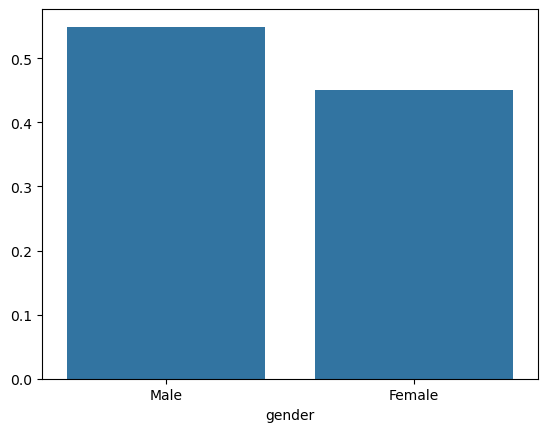

In [31]:
sns.barplot(x=pct_count.index,y=pct_count.values)
plt.show()

In [32]:
len(df2.select_dtypes('object').columns)

9

In [33]:
categorical_column=df2.select_dtypes(object).columns
categorical_column

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

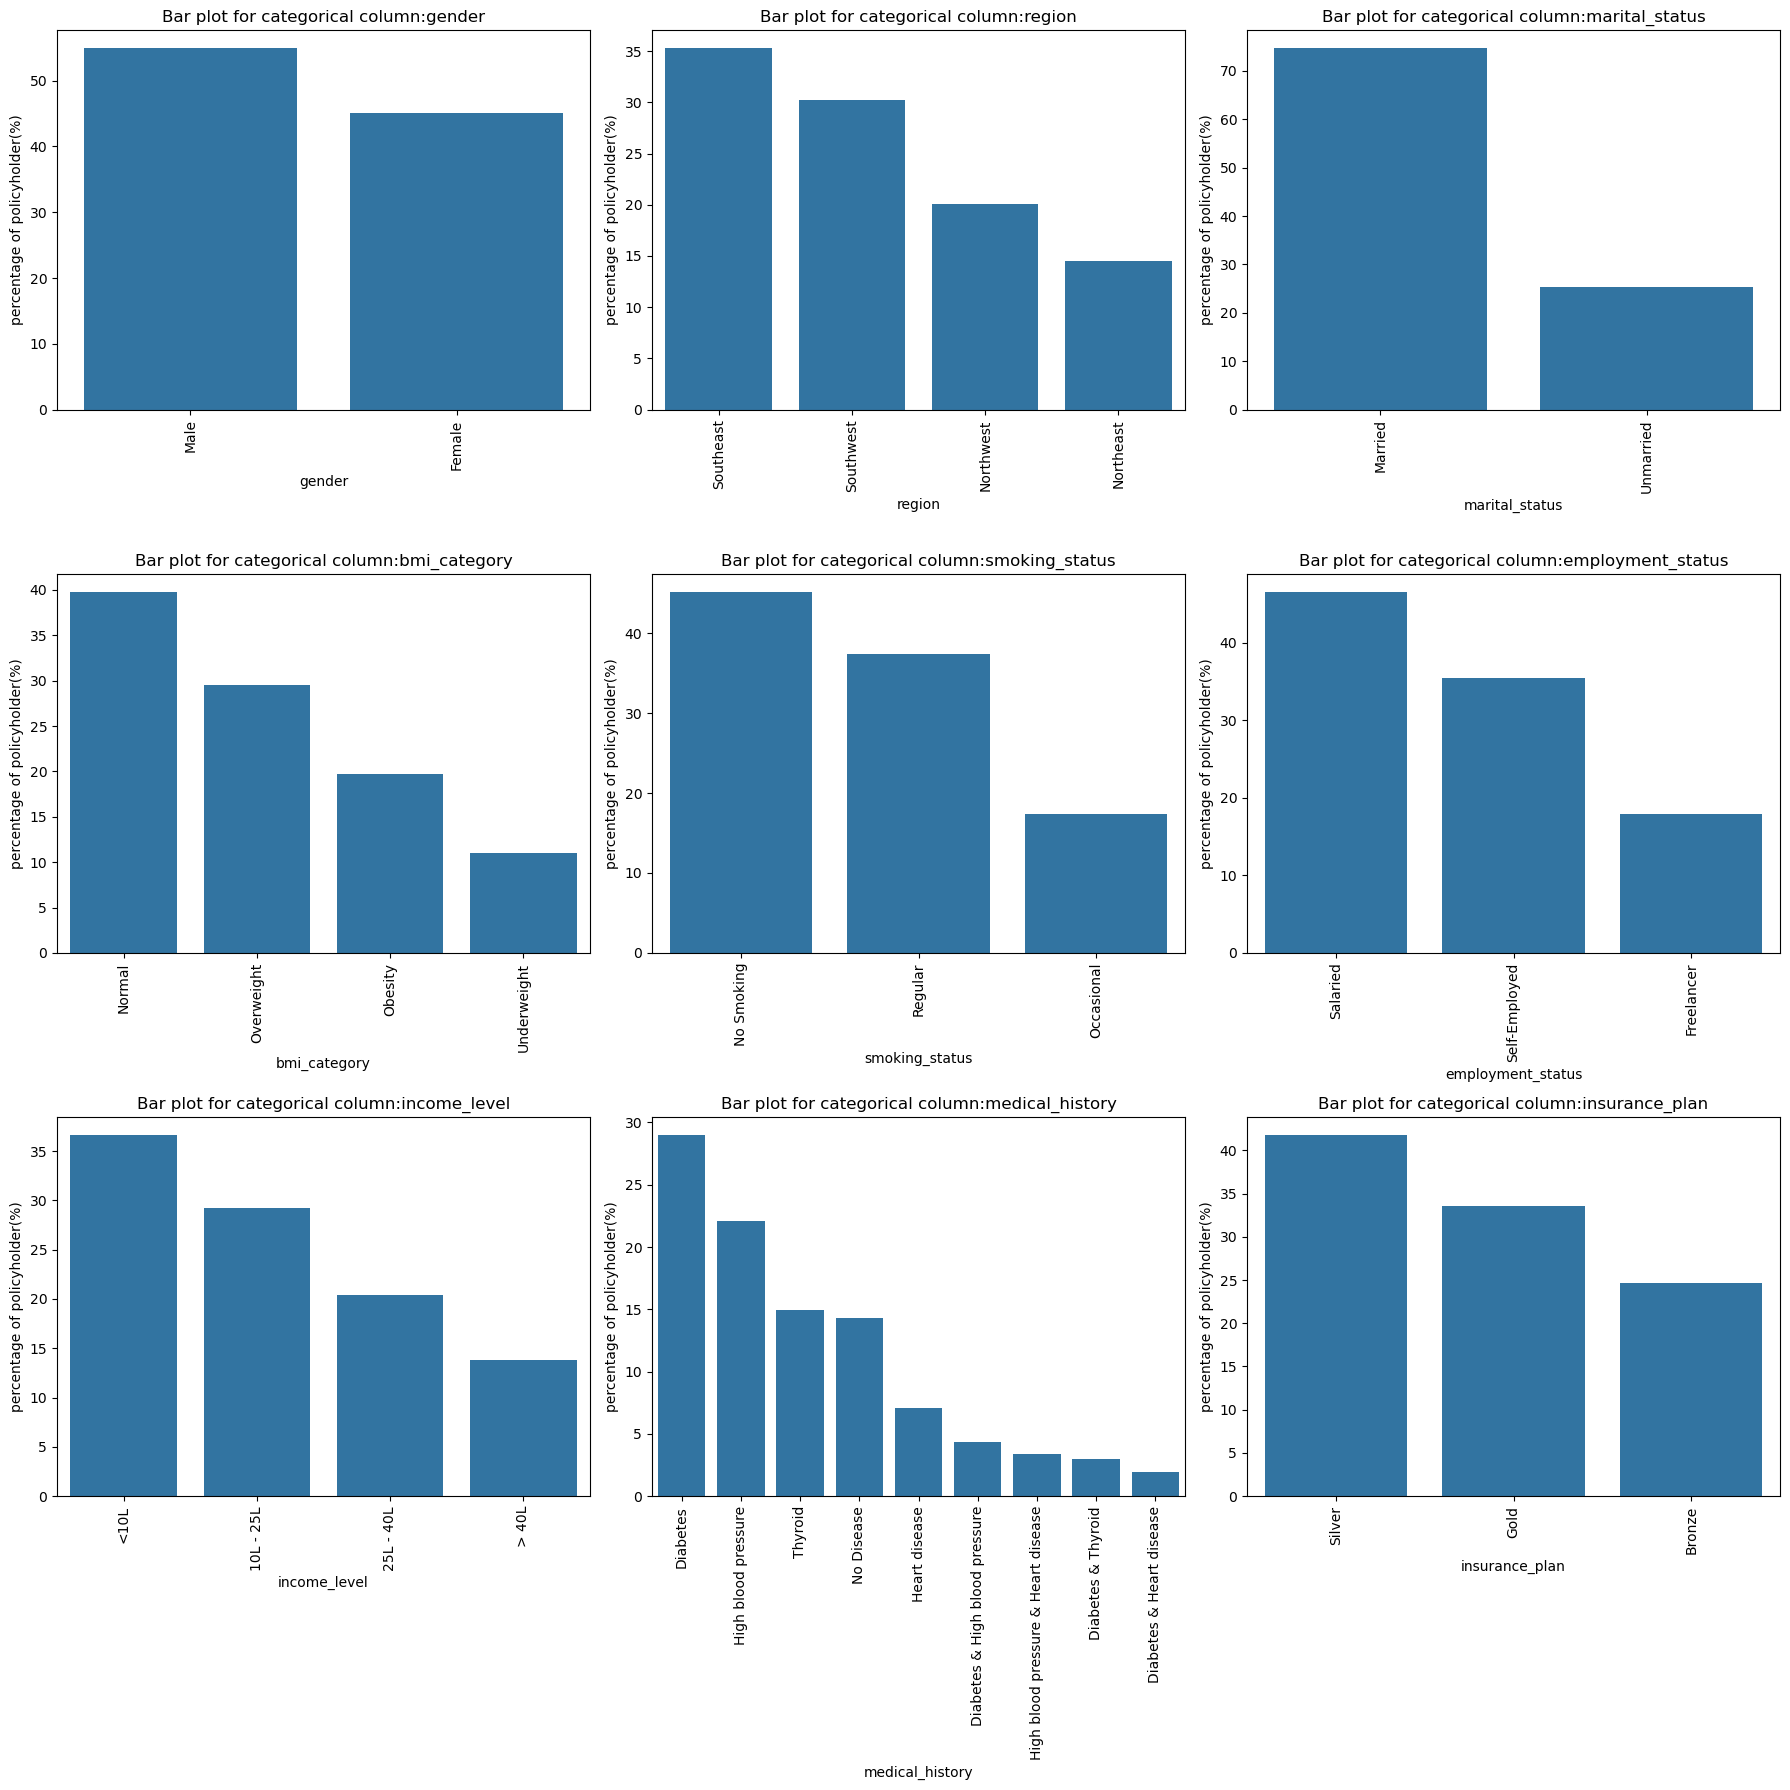

In [34]:
fig,axes=plt.subplots(3,3,figsize=(18,18))
axes=axes.flatten()

for ax,column in zip(axes,categorical_column):
    category_count=df2[column].value_counts(normalize=True)*100
    
    sns.barplot(x=category_count.index,y=category_count.values,ax=ax)
    ax.set_title(f"Bar plot for categorical column:{column}")
    ax.set_ylabel("percentage of policyholder(%)")
    ax.set_xlabel(column)
    ax.tick_params(axis='x', rotation=90)
    

plt.tight_layout()
plt.show()

In [35]:
crosstab=pd.crosstab(df2["income_level"],df2["insurance_plan"])

In [36]:
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,214,3287,618


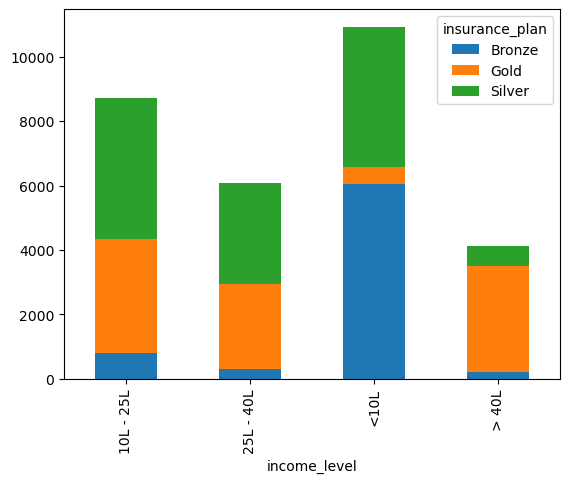

In [37]:
crosstab.plot(kind='bar',stacked=True)
plt.show()

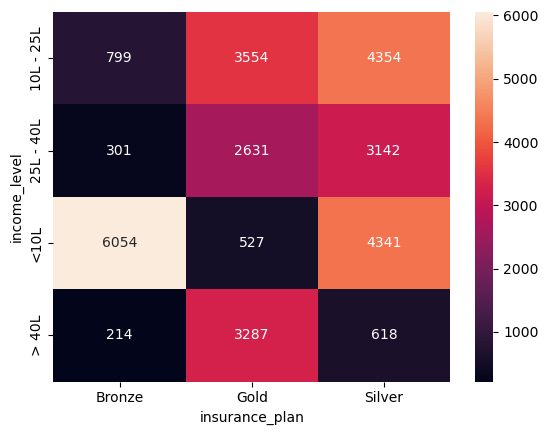

In [38]:
sns.heatmap(crosstab,annot=True,fmt='d')
plt.show()

In [39]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0


In [40]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

# Feature Engineering

In [41]:
risk_score={
    'diabetes':6,
    'high blood pressure':6,
    'no disease':0,
    'thyroid':5,
    'heart disease':8,
    'none':0
}
df2[["disease1","disease2"]]=df2.medical_history.str.split("&",expand=True).apply(lambda x:x.str.lower().str.strip().fillna('none'))

In [42]:
df2.sample(20)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
9920,41,Female,Northeast,Married,3,Overweight,No Smoking,Salaried,> 40L,62,Diabetes,Bronze,11346,0,diabetes,none
10918,35,Female,Southwest,Married,3,Overweight,No Smoking,Salaried,10L - 25L,13,Thyroid,Silver,18054,0,thyroid,none
10953,38,Female,Southeast,Unmarried,1,Normal,Regular,Salaried,<10L,7,No Disease,Bronze,10082,0,no disease,none
18486,42,Male,Southeast,Unmarried,1,Normal,Regular,Salaried,<10L,4,No Disease,Bronze,9559,0,no disease,none
20512,34,Female,Southeast,Unmarried,1,Normal,No Smoking,Freelancer,25L - 40L,33,Diabetes & High blood pressure,Silver,17467,0,diabetes,high blood pressure
13567,44,Male,Northwest,Married,3,Overweight,Regular,Freelancer,25L - 40L,25,High blood pressure,Silver,20383,0,high blood pressure,none
14785,58,Male,Northeast,Married,3,Underweight,Regular,Freelancer,<10L,4,Heart disease,Silver,25515,0,heart disease,none
4954,29,Male,Southwest,Married,2,Obesity,No Smoking,Salaried,<10L,8,High blood pressure,Silver,19212,0,high blood pressure,none
16542,38,Male,Southeast,Married,3,Underweight,No Smoking,Salaried,10L - 25L,10,Thyroid,Silver,15965,0,thyroid,none
1499,44,Male,Southwest,Married,5,Normal,No Smoking,Salaried,25L - 40L,34,Diabetes,Silver,15857,0,diabetes,none


In [43]:
df2["total_risk_score"]=df2['disease1'].map(risk_score)+df2['disease2'].map(risk_score)
df2['normalised_risk_score']=(df2["total_risk_score"]-df2['total_risk_score'].min())/(df2["total_risk_score"].max()-df2["total_risk_score"].min())

In [44]:
df2.sample(5)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalised_risk_score
19257,36,Male,Southeast,Married,3,Underweight,Regular,Self-Employed,10L - 25L,21,No Disease,Silver,17225,0,no disease,none,0,0.000000
23114,56,Male,Northwest,Married,3,Overweight,Occasional,Self-Employed,25L - 40L,33,Thyroid,Gold,29820,0,thyroid,none,5,0.357143
29357,32,Female,Southwest,Married,3,Underweight,Regular,Self-Employed,<10L,6,Diabetes,Bronze,12524,0,diabetes,none,6,0.428571
1837,47,Male,Southeast,Married,2,Obesity,No Smoking,Self-Employed,10L - 25L,23,Diabetes,Bronze,14340,0,diabetes,none,6,0.428571
21425,26,Female,Southwest,Married,3,Overweight,Regular,Salaried,10L - 25L,11,Thyroid,Silver,21133,0,thyroid,none,5,0.357143


In [45]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [46]:
df2.insurance_plan=df.insurance_plan.map({'Bronze':1,'Silver':2,'Gold':3})

In [47]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalised_risk_score
16640,34,Male,Southeast,Unmarried,2,Overweight,Regular,Self-Employed,10L - 25L,19,No Disease,3,25408,0,no disease,none,0,0.000000
13406,40,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,Thyroid,2,15999,0,thyroid,none,5,0.357143
790,48,Female,Northwest,Married,4,Underweight,No Smoking,Self-Employed,> 40L,74,Diabetes & High blood pressure,3,29521,0,diabetes,high blood pressure,12,0.857143
27764,28,Male,Southeast,Married,3,Obesity,Occasional,Salaried,<10L,4,Diabetes,1,14489,0,diabetes,none,6,0.428571
16493,32,Male,Northwest,Married,3,Underweight,No Smoking,Freelancer,<10L,1,High blood pressure,2,16064,0,high blood pressure,none,6,0.428571


In [48]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [49]:
df2.income_level=df2.income_level.map({'<10L':1, '10L - 25L':2, '> 40L':3, '25L - 40L':4})

In [50]:
nominal_col=['gender', 'region', 'marital_status','bmi_category', 'smoking_status','employment_status']

In [51]:
df3=pd.get_dummies(df2,columns=nominal_col,drop_first=True,dtype=int)

In [52]:
df3.sample(2)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
4251,44,0,3,93,Diabetes,3,22662,0,diabetes,none,...,0,0,1,0,0,0,1,0,1,0
4698,34,3,2,23,Diabetes & Heart disease,2,23177,0,diabetes,heart disease,...,0,0,0,0,0,1,0,1,0,0


In [53]:
df4=df3.drop(["medical_history","disease1","disease2","total_risk_score"],axis=1)

In [54]:
df4.sample(1)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
10792,32,2,4,35,2,21575,0,1.0,0,0,0,0,0,0,1,0,0,0,0,1


<Axes: >

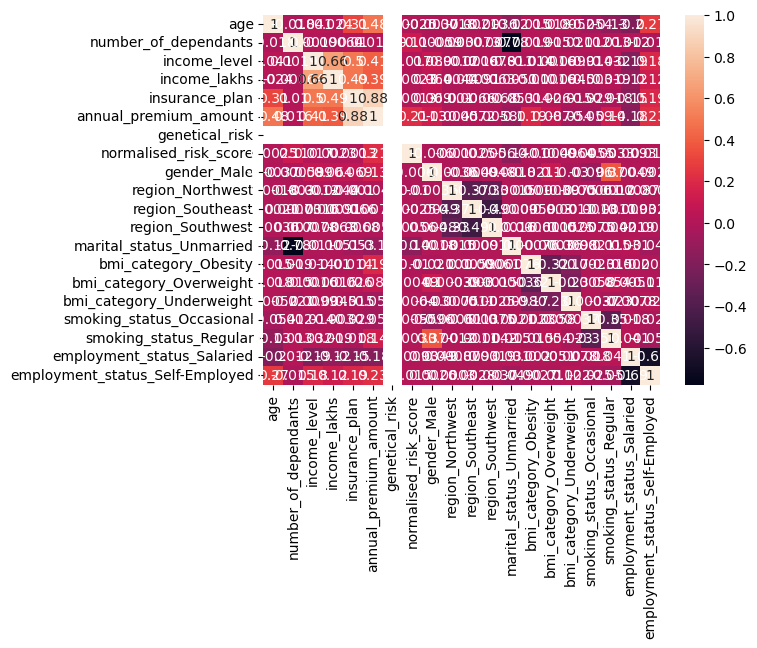

In [55]:
sns.heatmap(df4.corr(),annot=True)

In [56]:
X=df4.drop('annual_premium_amount',axis=1)
y=df4['annual_premium_amount']

In [57]:
X.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


In [58]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
cols_to_scale=['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
X[cols_to_scale]=scalar.fit_transform(X[cols_to_scale])

In [59]:
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.000000,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.000000,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.333333,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.666667,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.333333,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['column']=data.columns
    vif_df['Vif']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [61]:
calculate_vif(X)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,column,Vif
0,age,3.882319
1,number_of_dependants,6.292550
2,income_level,4.104266
3,income_lakhs,3.797992
4,insurance_plan,4.931114
5,genetical_risk,NaN
6,normalised_risk_score,3.815157
7,gender_Male,2.599039
8,region_Northwest,2.124859
9,region_Southeast,2.981854


###### we will drop columns only if the vif is greater than 10 and columns are to be dropped one by one and then checked for vif however we are dropping vif to match lecture requirement
| VIF Value  | Interpretation                                | Action Needed?               |
| ---------- | --------------------------------------------- | ---------------------------- |
| **1**      | No multicollinearity                          | ✅ Ideal                      |
| **1 - 5**  | Moderate correlation                          | ✅ Usually okay               |
| **5 - 10** | High correlation (possible multicollinearity) | ⚠️ Investigate further       |
| **> 10**   | Severe multicollinearity                      | ❌ Remove or combine features |


In [62]:
calculate_vif(X.drop("income_level",axis=1))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,column,Vif
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,genetical_risk,NaN
5,normalised_risk_score,3.808345
6,gender_Male,2.591439
7,region_Northwest,2.123277
8,region_Southeast,2.979899
9,region_Southwest,2.708641


In [63]:
X_reduced=X.drop('income_level',axis=1)

# Model Training

In [64]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.3,random_state=10)

In [65]:
print(f"X_train:{X_train.shape}")
print(f"X_test:{X_test.shape}")
print(f"y_train:{y_train.shape}")
print(f"y_test:{y_test.shape}")

X_train:(20875, 18)
X_test:(8947, 18)
y_train:(20875,)
y_test:(8947,)


In [66]:
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
y_pred=model_lr.predict(X_test)


train_score=model_lr.score(X_train,y_train)
test_score=model_lr.score(X_test,y_test)
train_score,test_score

(0.9534163989489616, 0.9538448451629948)

In [67]:
model_lr.intercept_

5935.981289344603

In [68]:
model_lr.coef_

array([ 7.01623933e+03, -1.31176470e+03, -7.08193369e+02,  1.48359882e+04,
        4.54747351e-13,  6.05362412e+03,  3.75582688e+01, -5.52508721e+01,
       -1.96225429e+01, -2.22896756e+01, -7.00320200e+02,  3.92681271e+03,
        1.97945605e+03,  6.12866236e+02,  8.37395101e+02,  2.80066184e+03,
       -4.54913671e+01,  2.43078421e+02])

In [69]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'normalised_risk_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

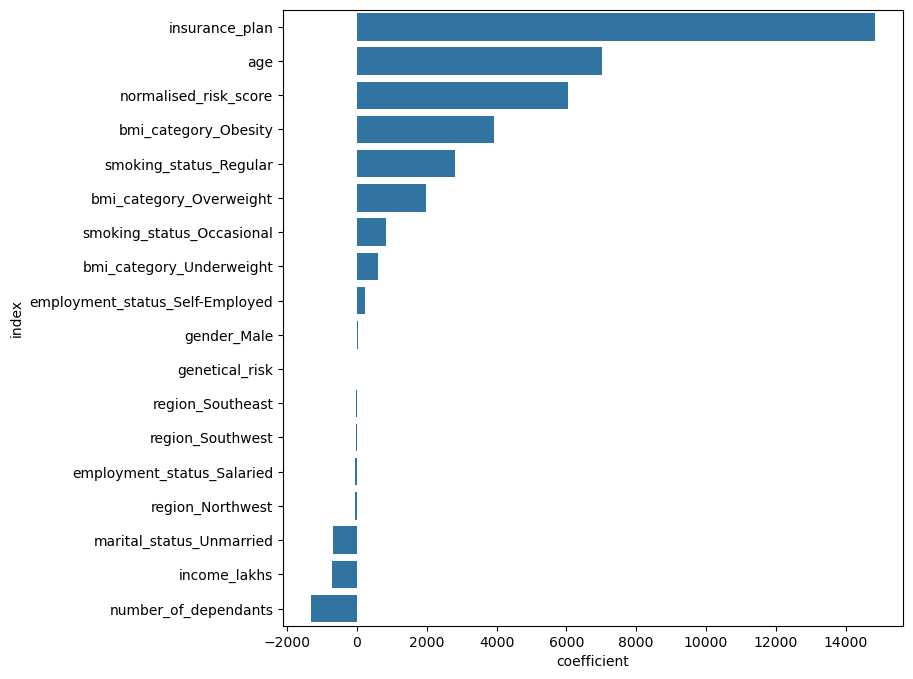

In [70]:
coef_df=pd.DataFrame(model_lr.coef_,X_test.columns,columns=["coefficient"]).reset_index()

coef_df=coef_df.sort_values(by='coefficient',ascending=False)
coef_df


plt.figure(figsize=(8,8))
sns.barplot(x=coef_df["coefficient"],y=coef_df["index"])
plt.show()

In [71]:
model_ridge=Ridge()

In [72]:
model_ridge=Ridge()
model_ridge.fit(X_train,y_train)
train_score=model_ridge.score(X_train,y_train)
test_score=model_ridge.score(X_test,y_test)
train_score,test_score

(0.9534162332209687, 0.9538456995663842)

In [73]:
from xgboost import XGBRegressor

In [74]:
from xgboost import XGBRegressor
model_xg=XGBRegressor()
model_xg.fit(X_train,y_train)
y_pred=model_xg.predict(X_test)
train_score=model_xg.score(X_train,y_train)
test_score=model_xg.score(X_test,y_test)
train_score,test_score

(0.9986370801925659, 0.9979538321495056)

In [75]:
rsme=root_mean_squared_error(y_test,y_pred)

In [76]:
rsme

311.14982789762087

In [77]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
print(np.sqrt(mse))

96814.21540071907
311.14982789762087


In [78]:
model_xgb=XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV
param_grid={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5]
}
random_search=RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2')
    

In [79]:
random_search.fit(X_train,y_train)
random_search.best_score_

0.9980716705322266

In [80]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.2}

In [81]:
best_model=random_search.best_estimator_

In [82]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)

In [83]:
best_model.feature_importances_

array([4.2947903e-02, 1.8758186e-05, 2.8247247e-05, 8.2343119e-01,
       0.0000000e+00, 3.0697757e-02, 2.1493624e-05, 3.0438356e-05,
       1.6728180e-05, 1.4124917e-05, 2.4394820e-05, 4.0744554e-02,
       2.1331651e-02, 1.6389587e-03, 4.3499493e-03, 3.4666426e-02,
       1.6865801e-05, 2.0483543e-05], dtype=float32)

In [84]:
feature_importance=best_model.feature_importances_
coef_df=pd.DataFrame(feature_importance,index=X_test.columns,columns=["coefficient"]).reset_index()

coef_df=coef_df.sort_values(by='coefficient',ascending=False)
coef_df

,index,coefficient
3,insurance_plan,0.823431
0,age,0.042948
11,bmi_category_Obesity,0.040745
15,smoking_status_Regular,0.034666
5,normalised_risk_score,0.030698
12,bmi_category_Overweight,0.021332
14,smoking_status_Occasional,0.004350
13,bmi_category_Underweight,0.001639
7,region_Northwest,0.000030
2,income_lakhs,0.000028


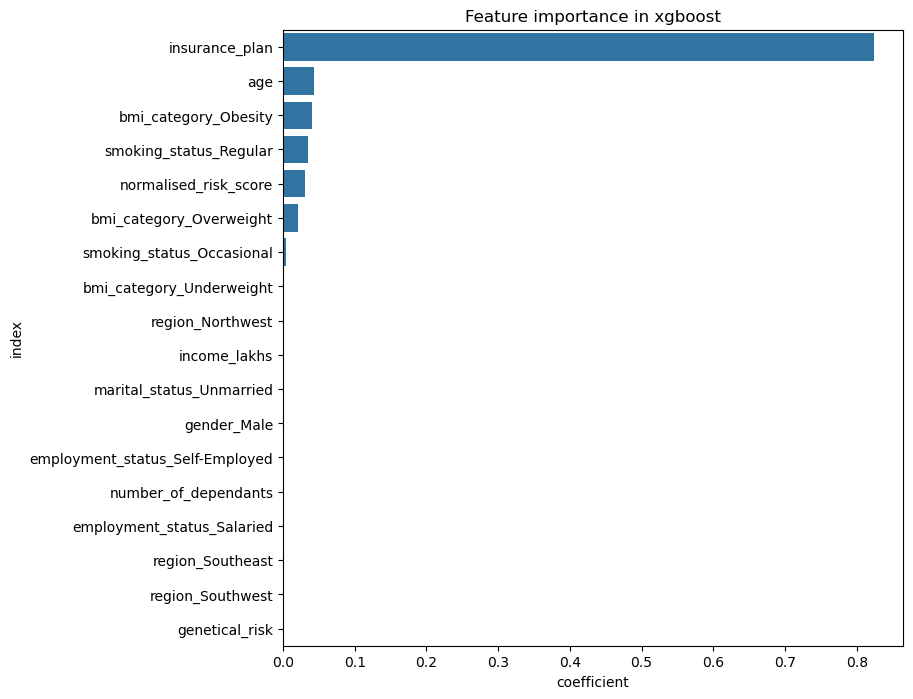

In [85]:
plt.figure(figsize=(8,8))
plt.title("Feature importance in xgboost")
sns.barplot(x=coef_df["coefficient"],y=coef_df["index"])
plt.show()

# Error Analysis

In [86]:
res=pd.DataFrame({
    'y_test':y_test,
    'y_pred':y_pred,
    
})

In [87]:
res['residuals']=res['y_pred']-res['y_test']
res['residual%']=res['residuals']*100/res['y_test']
res.head()

,y_test,y_pred,residuals,residual%
19713,26895,26611.138672,-283.861328,-1.055443
14750,22734,23093.667969,359.667969,1.582071
19932,21198,21507.083984,309.083984,1.458081
29643,9100,9087.669922,-12.330078,-0.135495
17076,26434,26533.542969,99.542969,0.376572


<Axes: xlabel='residual%', ylabel='Count'>

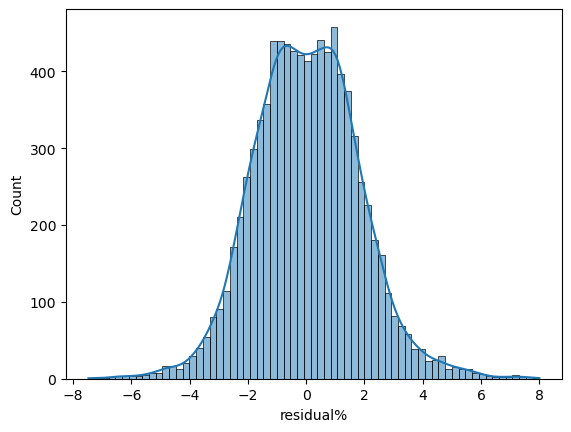

In [88]:
sns.histplot(res['residual%'],kde=True)

In [89]:
extreme_error=10
extreme_error_threshold=res[np.abs(res['residual%'])>extreme_error]

In [90]:
len(extreme_error_threshold)*100/len(res)

0.0

In [91]:
extreme_error=50
extreme_error_threshold=res[np.abs(res['residual%'])>extreme_error]

In [92]:
extreme_error_threshold.sort_values(by='residual%',ascending=False)

,y_test,y_pred,residuals,residual%


In [93]:
extreme_error_threshold.index

Index([], dtype='int64')

In [94]:
extreme_error_df=X_test.loc[extreme_error_threshold.index]

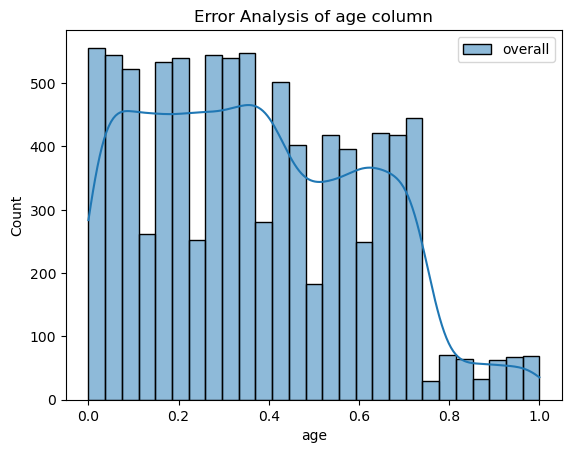

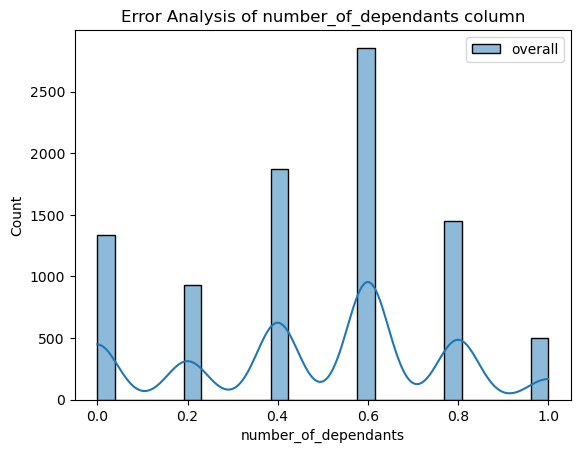

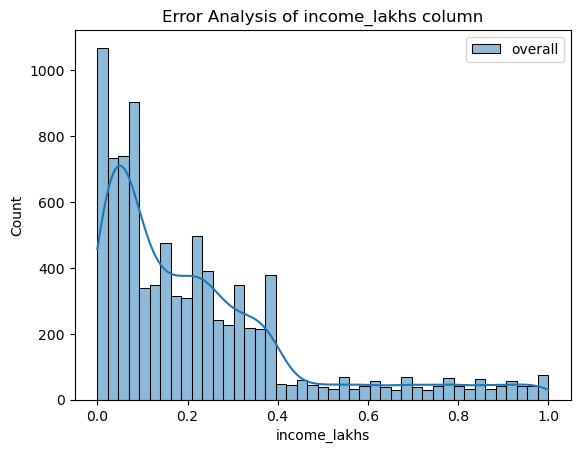

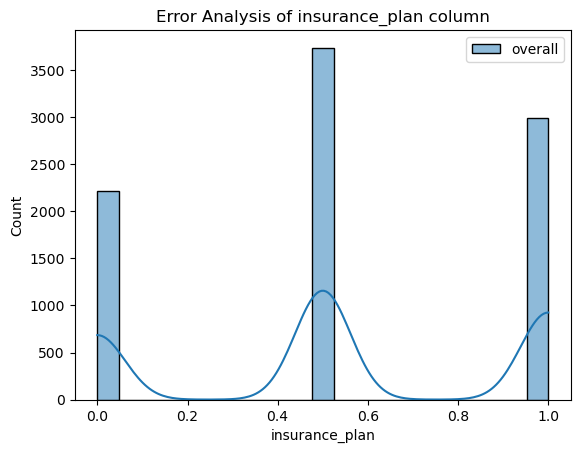

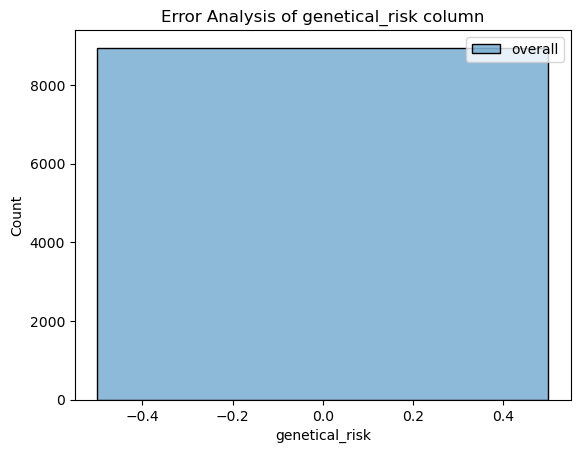

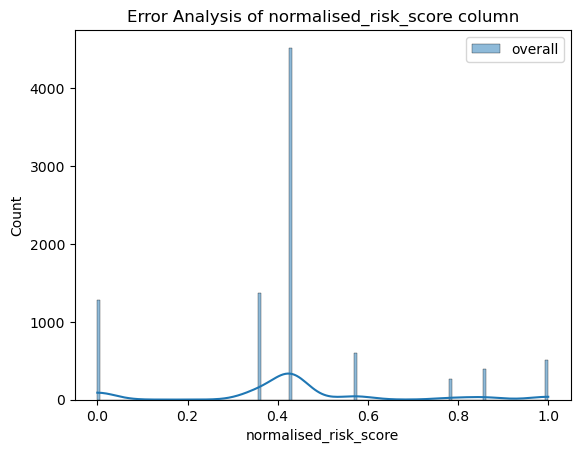

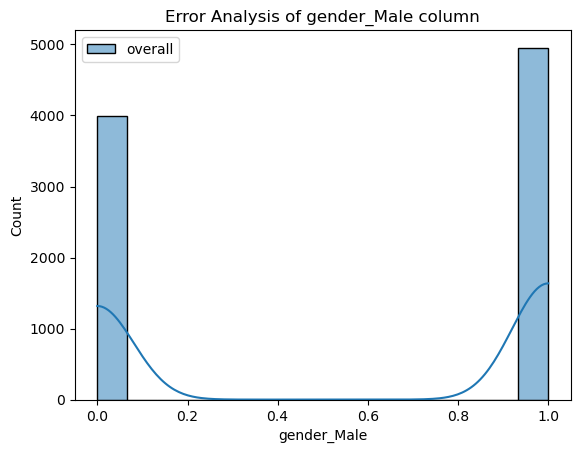

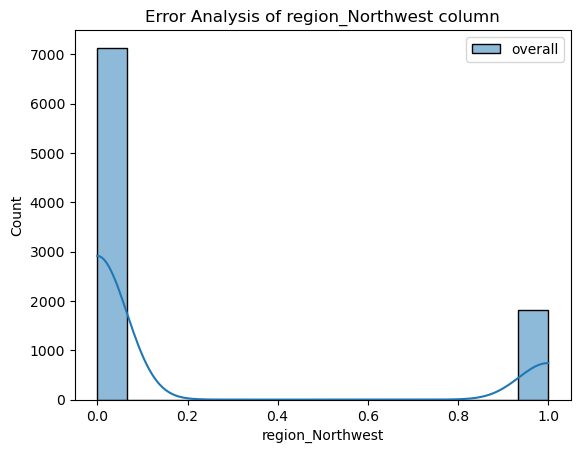

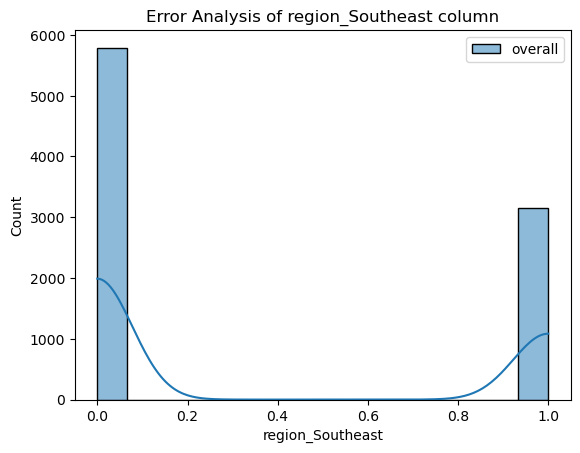

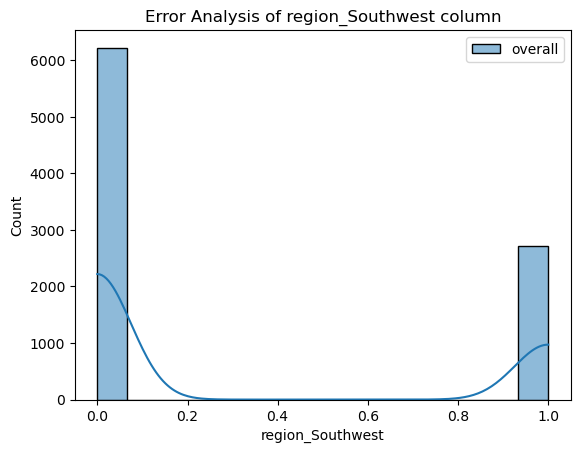

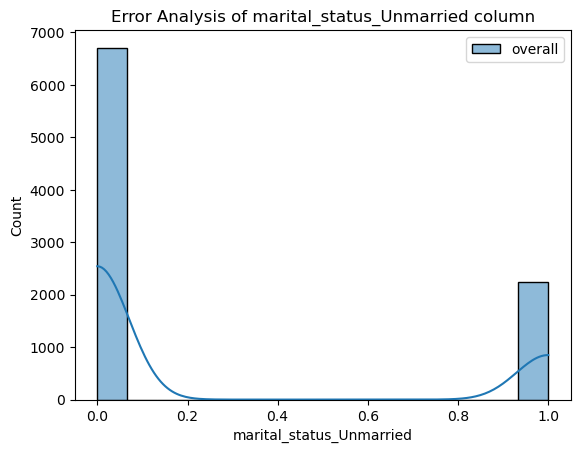

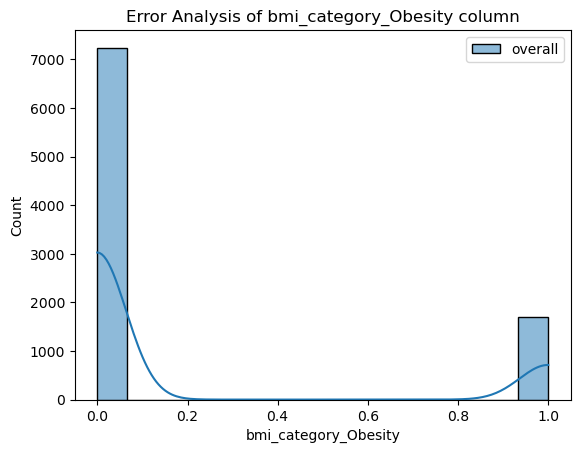

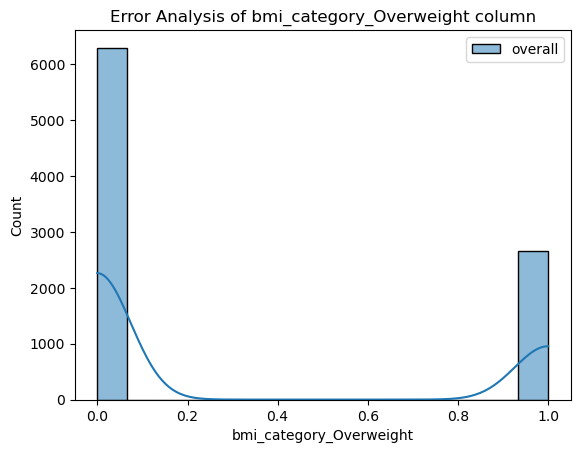

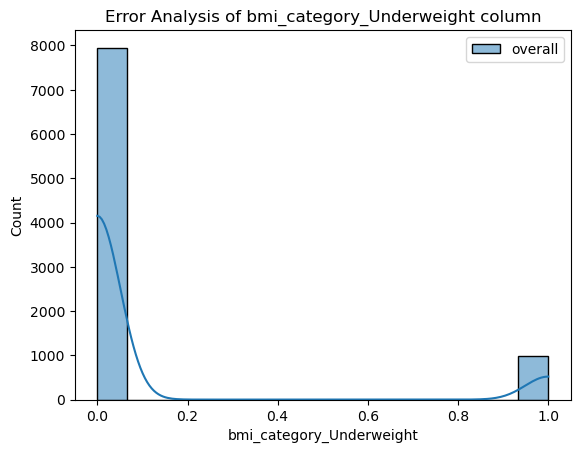

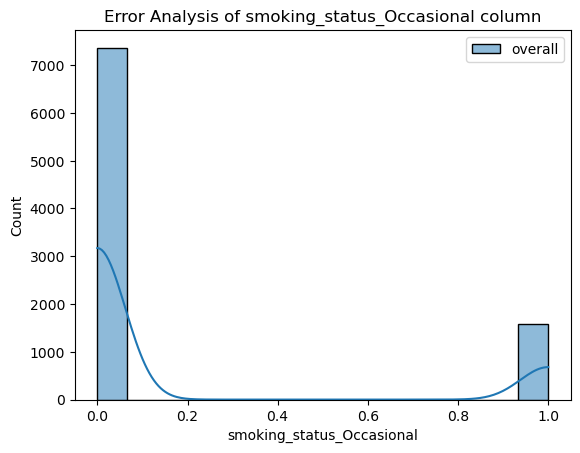

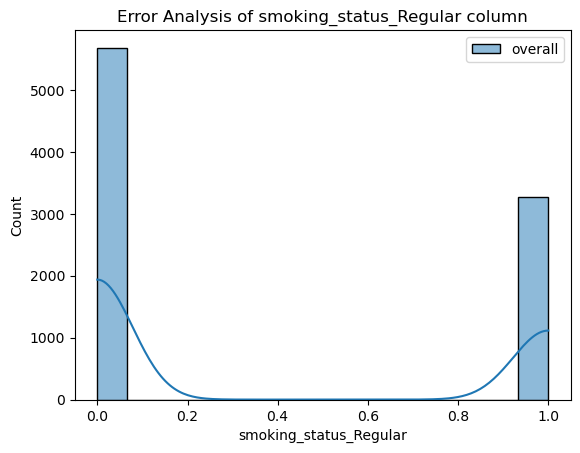

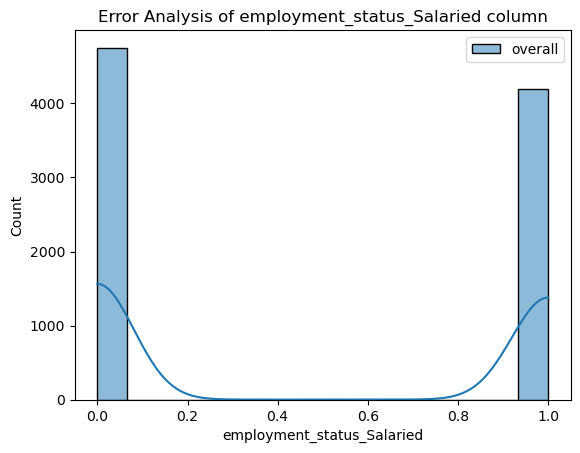

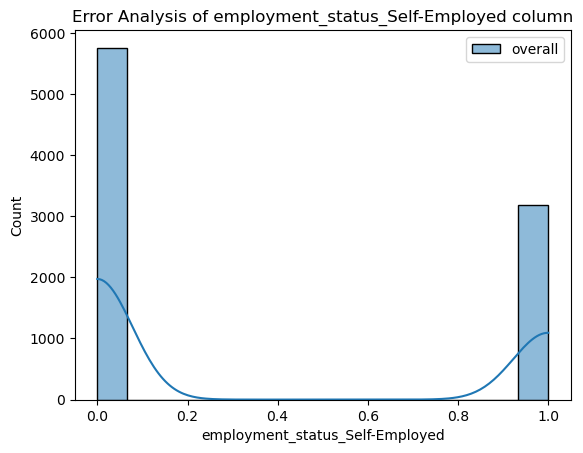

In [95]:
for i in X_test.columns:
    plt.title(f"Error Analysis of {i} column")

    sns.histplot(X_test[i],label='overall',kde=True)
    sns.histplot(extreme_error_df[i],label='extreme error',kde=True)
    plt.legend()
    plt.show()

#### so we can find there is a error is higher in Age column

In [96]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan',
 'genetical_risk']

# model Segmentation

In [97]:
import os
print(os.getcwd())

C:\Users\ankit\Python Project\Helth insurance project


In [98]:
from joblib  import dump
dump(best_model,r"C:\Users\ankit\Python Project\Helth insurance project\app\artaffect\model_adult.joblib")

scalar_with_cols={
    'scalar':scalar,
    'cols_to_scale':cols_to_scale
}
dump(scalar_with_cols,r"C:\Users\ankit\Python Project\Helth insurance project\app\artaffect\scalar_adult.joblib")


['C:\\Users\\ankit\\Python Project\\Helth insurance project\\app\\artaffect\\scalar_adult.joblib']